# <center> OCR with Tesseract for Handwritten Text Digitization </center>

## 1 &ensp; Problem Statement

Convert handwritten content into machine readable, editable format

![title](Problem_statement.PNG)

## 2 &ensp; Solution Approach

Use the open source tesseract engine to bulid the OCR model 

### Import the necessary libraries

In [1]:
import pytesseract as pta
import cv2
from PIL import Image, ImageDraw
import os
from matplotlib import pyplot as plt
from io import BytesIO
import numpy as np
import subprocess
%matplotlib inline

### Tesseract version used

In [2]:
pta.get_tesseract_version()

LooseVersion ('5.0.0-alpha.20200328')

## 3 &ensp; Output from "Out of the Box" Tessaract Engine

### Tesseract Engine Parameters

#### PSM - Page Segmentation Mode
- By default Tesseract expects a page of text when it segments an image. 
- Controls automatic page segmentation used by Tesseract

  0 &emsp;   Orientation and script detection (OSD) only.   
  1 &emsp;   Automatic page segmentation with OSD.   
  2 &emsp;   Automatic page segmentation, but no OSD, or OCR.   
  3 &emsp;   Fully automatic page segmentation, but no OSD. (Default)   
  4 &emsp;   Assume a single column of text of variable sizes.   
  5 &emsp;   Assume a single uniform block of vertically aligned text.   
  6 &emsp;   Assume a single uniform block of text.   
  7 &emsp;   Treat the image as a single text line.   
  8 &emsp;   Treat the image as a single word.   
  9 &emsp;   Treat the image as a single word in a circle.   
 10 &emsp;Treat the image as a single character.    
 11 &emsp;Sparse text. Find as much text as possible in no particular order.  
 12 &emsp;Sparse text with OSD.   
 13 &emsp;Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.
 
#### L - Language for the Input Text
 
- Controls the language for the input text
- [List of lanuages supported in Tesseract 4.0 ](https://github.com/tesseract-ocr/tesseract/blob/master/doc/tesseract.1.asc#languages-and-scripts)
    
#### OEM - OCR Engine Mode
- Controls the type of algorithm used by Tesseract

 0 &emsp; Legacy engine only    
 1 &emsp; Neural nets LSTM engine only      
 2 &emsp; Legacy + LSTM engines               
 3 &emsp; Default, based on what is available                
 
#### Dictionary and Word Lists
- Disabling the dictionaries Tesseract uses should increase recognition if most of your text isn’t dictionary words. They can be disabled by setting both of the configuration variables load_system_dawg and load_freq_dawg to false.
- If you know you will only encounter a subset of the characters available in the language, such as only digits, you can use the tessedit_char_whitelist configuration variable.


In [3]:
pta.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'
staging_dir = "C:/Users/Ishwa/Desktop/Learning/DataScience/AIML/OCR - Reading Handwritten Text/Test Images/Stage"
ready_dir = "C:/Users/Ishwa/Desktop/Learning/DataScience/AIML/OCR - Reading Handwritten Text/Test Images/Ready"
magick_convert = 'C:/Program Files/ImageMagick-7.0.10-Q16-HDRI/convert'


In [4]:
# Get the list of all test image files in the directory

os.chdir(staging_dir)
test_images = [f for f in os.listdir() if f.endswith(('.png','.jpeg','.jpg'))]
test_images


['Image1.jpg', 'Image2.jpg', 'Image3.jpg', 'Image4.jpg', 'Image5.jpg']

In [5]:
def drawBoxes(im, config):
    
    # Get bounding box estimates
    dim=pta.image_to_boxes(im, config=config)
    
    # Draw the rectangular boxes from the bounding box output
    H,W = im.height, im.width
    for b in dim.splitlines():
        b=b.split(' ')
        x,y,w,h=int(b[1]),int(b[2]),int(b[3]),int(b[4])
        shape = [(x,H-h), (w, H - y)] 
        img2 = ImageDraw.Draw(im)   
        img2.rectangle(shape, fill = None, outline ="green",width=6) 
        
    # Plot the image with bounding boxes
    fig, ax = plt.subplots(figsize=(20,10))    
    plt.imshow(im)
    plt.show()

In [6]:
start_bold = '\033[1m'
end_bold = '\033[0m'

def image_to_text(filenames, config, pre_process):
    if pre_process:
        #preProcess_ImageFiles()
        preProcess_Image_Magick()
        os.chdir(ready_dir) 
    print('current directory in image_to_text: ',os.getcwd())
    for file in filenames:
        im = Image.open(file)  
        text = pta.pytesseract.image_to_string(im, lang = 'eng',config=config)
        drawBoxes(im,config)
        print(f'{start_bold}File name: {end_bold}{file}\n\n{start_bold}Converted Text: {end_bold} \n{text}\n')
    os.chdir(staging_dir)
    

In [7]:
def preProcess_Image_Cv2():
    for file in os.listdir(ready_dir):
        os.remove(os.path.join(ready_dir,file))
    #kernel = np.ones((1,1), np.uint8)
    for file in os.listdir():
        name, extension = os.path.splitext(file)
        print(name, extension)
        if file.endswith(('.png','.jpeg','.jpg')):
            img = cv2.imread(file)
            #img = cv2.resize(img,(300,300))
            
            # Convert to Gray
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply dilation and erosion to remove noise
            #img = cv2.dilate(img, kernel, iterations = 5)
            #img = cv2.erode(img, kernel, iterations=5)
            #ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
            #cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
            #cv2.adaptiveThreshold(cv2.medianBlur(img,3), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,31,2)
            
            # works better
            #ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            
            #ret,img = cv2.threshold(cv2.GaussianBlur(img,(5,5),0),0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            
            #if extension in ('.jpeg', '.jpg'):         
                #cv2.imwrite(target_dir+name+target, img)
            #elif extension == '.png':
        cv2.imwrite(ready_dir+'\\'+file,img)
                #im.save(target_dir+file)

In [8]:
def preProcess_Image_Magick():
    os.chdir(staging_dir)
    #cmd = ['C:/Program Files/ImageMagick-7.0.10-Q16-HDRI/convert',input,'-normalize','-negate', '-lat', '50x50+10%','-contrast-stretch', '0','-blur','1x65535', '-level', '50x100%', '-compose', 'copy_opacity', '-opaque','none','-background','white', '-adaptive-blur', '3', '-units','PixelsPerInch', '-density', '300','out14.jpg']
    #cmd = [magick_convert,file_path,'-normalize','-intensity', 'Rec709luminance','-colorspace', 'gray','-auto-level','-contrast-stretch', '0','-blur','1x65535','-compose', 'copy_opacity', '-alpha', 'off', '-fill', 'white','-opaque','rgb(220,173,38)','-background','white', '-units','PixelsPerInch', '-density', '300', '-resize','480x360', out_file]
    #cmd = ['C:/Program Files/ImageMagick-7.0.10-Q16-HDRI/convert',input,'-normalize','-intensity', 'Rec709luminance','-colorspace', 'gray','-auto-level','-blur','1x65535','-alpha', 'off', '-fill', 'white','-opaque','rgb(220,173,38)','-background','white', '-units','PixelsPerInch', '-density', '300','output16.jpg']
    
    for file in os.listdir(ready_dir):
        os.remove(os.path.join(ready_dir,file))
    print('current directory in Magick preprocessing: ',os.getcwd())
    
    for file in os.listdir():
        out_file = ready_dir+'/'+file
        file_path = staging_dir+'/'+file
        #cmd = [magick_convert,file_path,'-normalize','-intensity', 'Rec709luminance','-colorspace', 'gray','-auto-level','-contrast-stretch', '0','-alpha', 'off', '-fill', 'white','-opaque','rgb(220,173,38)','-resize','10%', out_file]
        #cmd = [magick_convert,input,'-normalize','-colorspace', 'gray','-resize', '12%','-bordercolor', 'white', '-border','10x10','-quality', '90', 'output5.jpg']
        cmd = [magick_convert,file_path,'-normalize','-colorspace', 'gray','-resize', '12%', out_file]
        cmd_return_code = subprocess.call(cmd, shell=False)
        #print(f"MagickCommand return code: {cmd_return_code}, file: {file},file_path: {file_path}, out_file: {out_file}")
        if cmd_return_code != 0:
            print("MagickCommand has failed with error code ",cmd_return_code)
            return
    print("Image Preprocessing Successful")        
        

current directory in image_to_text:  C:\Users\Ishwa\Desktop\Learning\DataScience\AIML\OCR - Reading Handwritten Text\Test Images\Stage


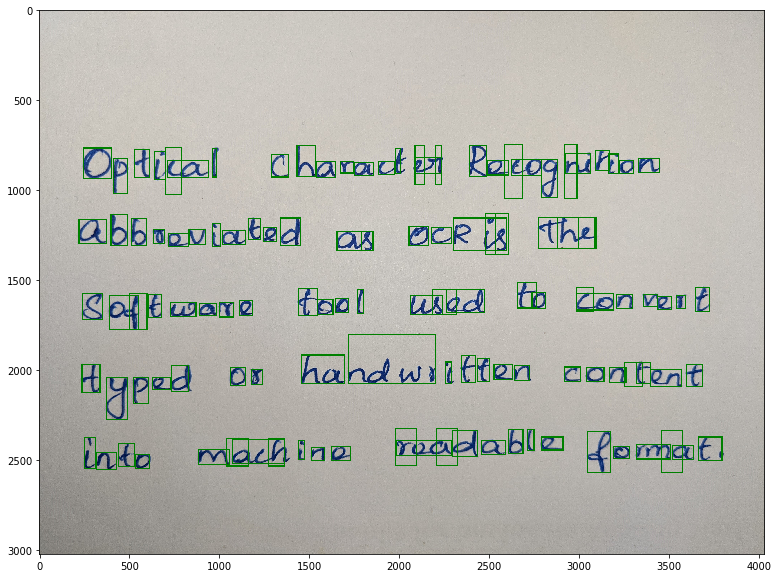

File name: Image1.jpg

Converted Text:  
Optical Charact e71 Kecog nition
Abbreviated ae OcR (x the
Saltware tool wed to Convert
typed OY Bis tien content

into math ine roadable Lomat.




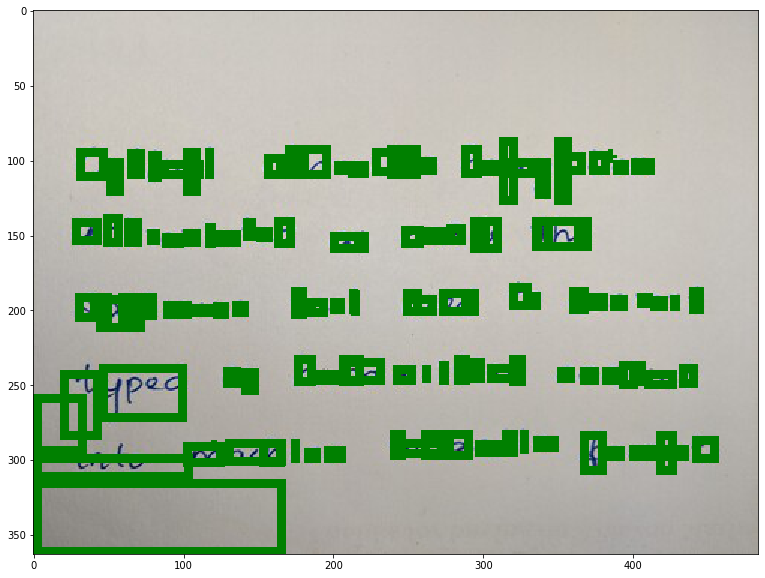

File name: Image2.jpg

Converted Text:  
Optical Character Rocog nition
Abbreviated as ocRig the
Goaf{tware tool used to convert
“i os handwritten content

  
 

machine readable Lomat,




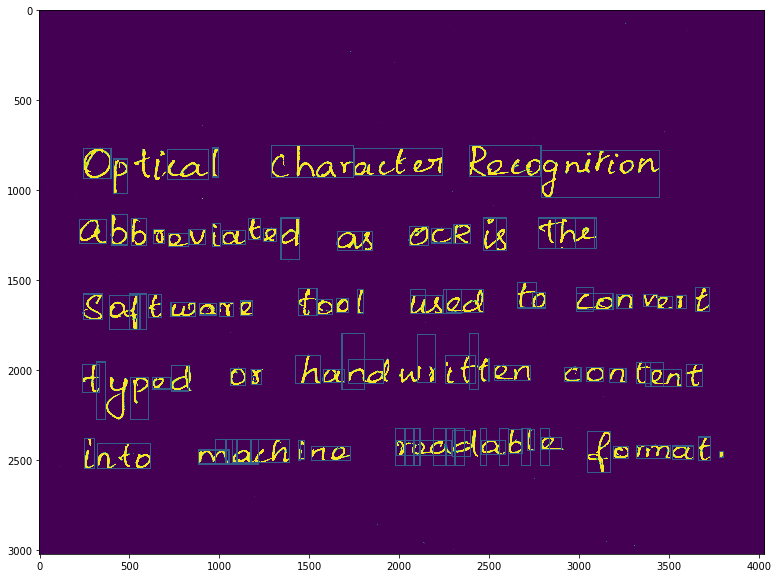

File name: Image3.jpg

Converted Text:  
Oe 7a Re ea
Abbreviated ag ocRig the
Saf{tware tool used to Convert
io aes oF Peer tte et content

NR oatets ata raeYoR=, (omola-o Lo mat.




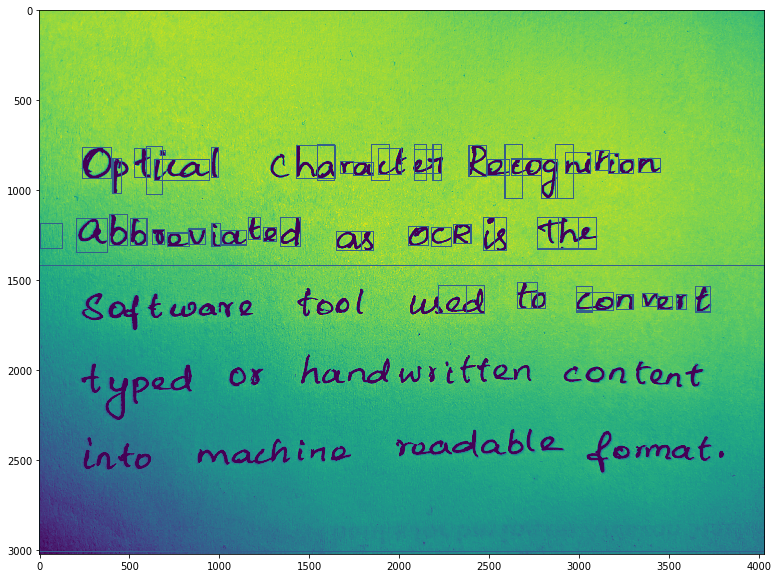

File name: Image4.jpg

Converted Text:  
Op tical haract o71 Recognition
i Abbtov iated gx OcR (x the

od to convert

 




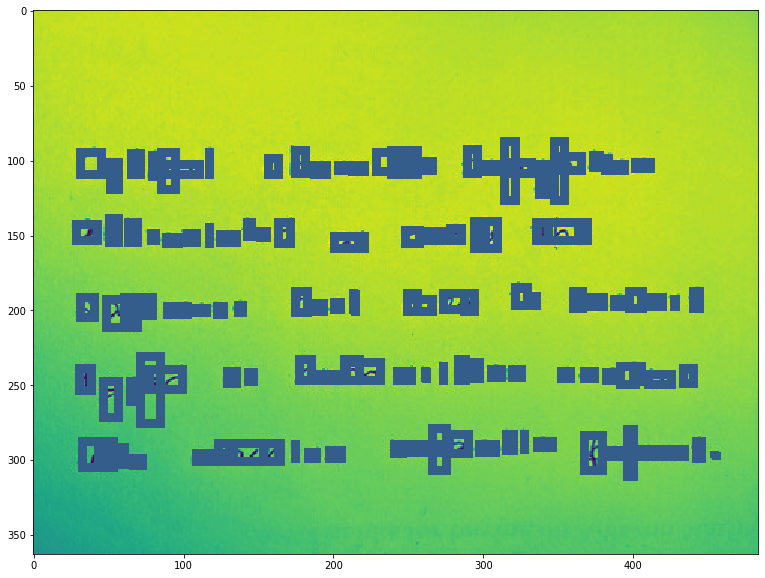

File name: Image5.jpg

Converted Text:  
Optical Character Recognition
Abbreviated as ocRig the
Software tool used to convert
typed os handwritten content

into machine readable format:




In [10]:
# Default config to convert images using out of the box engine
std_config = ('-l eng --oem 3 --psm 6')
optimized_config = ('-l eng --oem 1 --psm 4')

# Funcation call for conversion
image_to_text(test_images,optimized_config,False)
